### 字符/单个字格的特征 char_fea

### line特征 line_fea
- 位置特征  起始位置（第一个字符的位置） 终止位置（最后一个字符的位置）  该行在整个block的位置
文字特征


# <center> rules</center>

In [4]:
import re

In [5]:
sth = "\d"
content = "12121我"

def matchsth(content,sth):
    zhmodel = re.compile(sth)    #检查中文
    #zhmodel = re.compile(u'[^\u4e00-\u9fa5]')   #检查非中文
    match = zhmodel.findall(content)
    return match
matchsth(content,sth)

['1', '2', '1', '2', '1']

In [75]:
content = "一般来说"
matchsth(content,sth='/[一般]/')

[]

In [76]:
is_has_sth(content,sth=u'一般|三线')

1

In [54]:
import re
def is_has_sth(content,sth=u'[\u4e00-\u9fa5]'):
    """
    是否包含sth
    中文： [\u4e00-\u9fa5]
    数字： u'[0-9]'
    """
    zhmodel = re.compile(sth)    #检查中文
    #zhmodel = re.compile(u'[^\u4e00-\u9fa5]')   #检查非中文
    match = zhmodel.search(content)
    # print(match)
    if match:
        return 1
    else:
        return 0
is_has_sth("我是8,013.36       -5,799,427.42 -734,832.30",sth=u'[0-9]')

1

In [37]:

is_has_sth("第1节",sth=u'[（]*[）]|[(]*[)]|[第]*[章|节]')

<_sre.SRE_Match object; span=(2, 3), match='节'>


1

# <center>plumber</center>

In [63]:
import pdfplumber


In [64]:
# pdf =  pdfplumber.open("./pdfs/pdf_catas/年度报告多页.pdf")

# file_name = "深圳广田集团股份有限公司 2018 年年度报告摘要.PDF"
file_name = "天科股份2017年年度报告摘要.pdf"
# pdf =  pdfplumber.open("./pdfs/pdf_catas/比音勒芬.PDF")

pdf =  pdfplumber.open("./pdfs/pdf_catas/%s" % file_name)

In [65]:
def isnewlines(c0,c1):
    """
    是否换行
    """
    # if c1["text"] in ["、"]:
    #     print(c1)
    if (c0["y0"] - c1["y0"]) * (c0["y0"] - c1["y1"]) <= 0 or c1["text"] in ["、"]:  # 不换行
        return False
    else:
        return True

In [31]:
pdf.pages[0].chars[0]

{'fontname': "b'ABCDEE+\\xcb\\xce\\xcc\\xe5'",
 'adv': Decimal('9.000'),
 'upright': 1,
 'x0': Decimal('345.220'),
 'y0': Decimal('795.591'),
 'x1': Decimal('354.220'),
 'y1': Decimal('804.591'),
 'width': Decimal('9.000'),
 'height': Decimal('9.000'),
 'size': Decimal('9.000'),
 'object_type': 'char',
 'page_number': 1,
 'text': '深',
 'top': Decimal('37.329'),
 'bottom': Decimal('46.329'),
 'doctop': Decimal('37.329')}

In [66]:
import copy
def pdf2rows(pdf):
    """
    利用plumber解析出纯文本()
    返回 text，cs，row_no 行号
    """
    rows = []
    row_template = {"text": "", "cs": [], "page_no": 1, "heights": [], "row_no": 0}  # 
    cur_row = copy.deepcopy(row_template)
    page_cnt = 1
    line_cnt = 1
    ROW_NO = 0
    cur_c = pdf.pages[0].chars[0]
    #     print(cur_top)
    for page in pdf.pages:  # 逐页
        #         print(page_cnt)
        for c in page.chars:
            #             print(c)
            if len(cur_row["cs"]) > 0 and (isnewlines(cur_row["cs"][0], c) and isnewlines(cur_c, c)):
                #             if isnewlines(cur_c,c):
                #                 cur_row["height"] = max(cur_row["heights"])
                rows.append(cur_row)
                cur_row = copy.deepcopy(row_template)
                cur_row["page_no"] = c["page_number"]
                cur_row["row_no"] = ROW_NO
                ROW_NO += 1
            cur_row["text"] += c["text"]
            cur_row["cs"].append(c)
            cur_row["heights"].append(c["height"])
            cur_c = c
        page_cnt += 1
    rows.append(cur_row)
    return rows
rows = pdf2rows(pdf)
# rows[0:2]

In [68]:
for row in rows:
    if row["page_no"] == 2:
        print(row["text"],len(row["text"]))

2 / 10  8
  1
  1
一 重要提示  7
1 本年度报告摘要来自年度报告全文，为全面了解本公司的经营成果、财务状况及未来发展规 42
划，投资者应当到上海证券交易所网站等中国证监会指定媒体上仔细阅读年度报告全文。  40
2 本公司董事会、监事会及董事、监事、高级管理人员保证年度报告内容的真实、准确、完 41
整，不存在虚假记载、误导性陈述或重大遗漏，并承担个别和连带的法律责任。  36
  1
3 未出席董事情况  10
未出席董事职务 未出席董事姓名 未出席董事的原因说明 被委托人姓名  34
董事 吴昱 因公出差 苏静祎  15
  1
  1
4 北京兴华会计师事务所（特殊普通合伙）为本公司出具了标准无保留意见的审计报告。  41
  1
  1
5 经董事会审议的报告期利润分配预案或公积金转增股本预案  29
经北京兴华会计师事务所（特殊普通合伙）审计确认，公司2017年度实现归属于母公司所有 42
者的净利润58,881,768.40元，可供全体股东分配的利润279,185,526.61元。根据《公司章程》 55
关于公司分红的规定，保持分红政策的稳定性，并考虑到公司经营资金的需求，建议公司本年度 42
实施利润分配方案为：  11
以2017年12月31日总股本297,193,292股为基数，向全体股东每10股派发现金红利 0.6 50
元（含税），共计派发股利 17,831,597.52元（含税），公司不进行资本公积金转增。  46
  1
二 公司基本情况  9
1 公司简介  7
公司股票简况  7
股票种类 股票上市交易所 股票简称 股票代码 变更前股票简称  31
A 1
股 上海证券交易所 天科股份 600378  22
   2
  1
联系人和联系方式 董事会秘书 证券事务代表  22
姓名 冯新华 魏冬梅  11
办公地址 四川省成都市机场路常乐二段2号 四川省成都市机场路常乐 32
二段2号  5
电话 028-85963417 028-85963659  29
电子信箱 ctyc@tianke.com ctyc@tianke.com  37
  1


In [20]:
from functools import reduce
def add(x,y):
#     print(x['x0'])
    return float(x['x0']) + float(y['x0'])

In [25]:
# a = [{'k3':"4"},{'k3':"2"},{'k3':"1"}]
# dict.fromkeys(a)

In [ ]:
def is_cover_page(page):
    """
    是否是封面
    统计Y轴方向有字的比例
    """
    top_bottoms = []
    for c in page.chars:
        # print(c["text"])
        top_bottoms.append([c["top"],c["bottom"]])
    top_bottoms = sorted(top_bottoms,key=lambda x:x[0])
    res_top_bottoms = [top_bottoms[0]]
    for c in top_bottoms:
        
        if c[0] > res_top_bottoms[-1][1] or c[1]< res_top_bottoms[-1][0]:
            res_top_bottoms.append(c)
        else:
            if c[0]<res_top_bottoms[-1][0]:
                res_top_bottoms[-1][0] = c[0]
            if c[1]>res_top_bottoms[-1][1]:
                res_top_bottoms[-1][1] = c[1]
    print(res_top_bottoms)
    L = float(res_top_bottoms[-1][1] - res_top_bottoms[0][0])
    LL = 0
    for c in res_top_bottoms:
        LL += float(c[1]-c[0])
    return LL/L
is_cover_page(pdf.pages[0])

In [44]:
 #  当前页中垂线的X轴坐标 

def cal_mid_x(pages):
    res = []
    counter_page = 0
    for page in pages:  # 逐页
        counter_page += 1
        cs = [float(c["x0"])  for c in page.chars]
        res.append({counter_page:sum(cs)/len(cs)})
    return  res
cal_mid_x(pdf.pages)

[{1: 258.1422342569268},
 {2: 277.4613643659721},
 {3: 303.6980425219952},
 {4: 238.42856782334445},
 {5: 267.07065199590727},
 {6: 246.53161888509706},
 {7: 287.9976036585361}]

In [54]:
heights = []
texts = []
counter_page = 0
for page in pdf.pages:  # 逐页
    counter_page += 1
    print("page",counter_page)
    for c in page.chars:
        heights.append(c["height"])
        # print(c["text"]

page 1
page 2
page 3
page 4
page 5
page 6
page 7


In [69]:
import collections
# heights = [1,2,3,4,5,6,5,5,5,5,4,4,]
obj = dict(collections.Counter(heights))
# array = [{"age":20,"name":"a"},{"age":25,"name":"b"},{"age":10,"name":"c"}]
array = sorted(obj.items(),key=lambda x:x[0],reverse=False)
array

[(Decimal('8.181'), 1980),
 (Decimal('9.000'), 3527),
 (Decimal('9.376'), 30),
 (Decimal('9.377'), 26),
 (Decimal('10.500'), 409),
 (Decimal('10.716'), 13),
 (Decimal('10.908'), 1),
 (Decimal('12.000'), 47),
 (Decimal('16.074'), 6),
 (Decimal('18.000'), 19)]

In [70]:
xs = [float(a[0]) for a in array]
ys = [a[1] for a in array]
ys = [y/sum(ys) for y in ys]
xs

[8.181, 9.0, 9.376, 9.377, 10.5, 10.716, 10.908, 12.0, 16.074, 18.0]

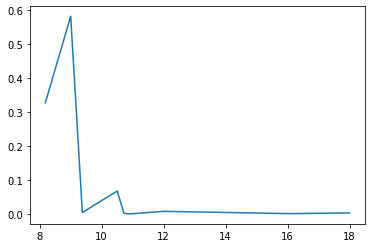

In [71]:
import matplotlib.pyplot as plt
plt.plot(xs, ys)

In [140]:
# pdf中的表格
pages = pdf.pages
# i = 1
# for page in pages:
#     i += 1
#     print(i)
#     for table in page.find_tables():
#         print(table.bbox) 

page = pages[-1]
bboxes = []
for table in page.find_tables():
    # print(table.bbox) 
    bboxes.append(table.bbox)
    print(table.extract())
bboxes[0]

[['备查文件目录', '(一)载有公司法定代表人、主管会计负责人、会计机构负责人签名并盖章的财务报表。'], ['备查文件目录', '(二)载有会计师事务所盖章、注册会计师签名并盖章的财务、内控审计报告原件。'], ['备查文件目录', '(三)报告期内在《上海证券报》、上交所网站公开披露过的所有公司文件正本及公告\n的原稿。']]


(Decimal('62.280'), Decimal('167.300'), Decimal('533.260'), Decimal('223.340'))

In [149]:
def is_in_table(x,y,bboxes):
    for box in bboxes:
        if box[0]<x and x<box[2] and box[1]<y and y<box[3]:
            return True
    return False
is_in_table(147.980,179.709,bboxes)

True

In [148]:
for c in page.chars:
    if c["text"] in ["三","告","章"]:
        # print(c["text"],c["x1"],c["y1"])
        print(c)

{'fontname': "b'ABCDEE+\\xcb\\xce\\xcc\\xe5'", 'adv': Decimal('9.000'), 'upright': 1, 'x0': Decimal('321.050'), 'y0': Decimal('788.811'), 'x1': Decimal('330.050'), 'y1': Decimal('797.811'), 'width': Decimal('9.000'), 'height': Decimal('9.000'), 'size': Decimal('9.000'), 'object_type': 'char', 'page_number': 120, 'text': '告', 'top': Decimal('44.109'), 'bottom': Decimal('53.109'), 'doctop': Decimal('98013.189')}
{'fontname': "b'ABCDEE+\\xcb\\xce\\xcc\\xe5'", 'adv': Decimal('10.560'), 'upright': 1, 'x0': Decimal('463.502'), 'y0': Decimal('662.211'), 'x1': Decimal('474.062'), 'y1': Decimal('672.771'), 'width': Decimal('10.560'), 'height': Decimal('10.560'), 'size': Decimal('10.560'), 'object_type': 'char', 'page_number': 120, 'text': '章', 'top': Decimal('169.149'), 'bottom': Decimal('179.709'), 'doctop': Decimal('98138.229')}
{'fontname': "b'ABCDEE+\\xcb\\xce\\xcc\\xe5'", 'adv': Decimal('10.560'), 'upright': 1, 'x0': Decimal('263.559'), 'y0': Decimal('648.171'), 'x1': Decimal('274.119'), '